<a href="https://colab.research.google.com/github/muffin-head/Cancer-caseStudy/blob/Univariate-analysis/Cancer_caseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing data

In [2]:
import pandas as pd
text_data= pd.read_csv('/content/drive/MyDrive/data cancer/training_text/training_text',sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
text_data.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


# Preprocessing

In [3]:
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
stop_word= set(stopwords.words('english'))
def preprocessing(text,index,col):
  if type(text) is not int:
    text_string=""
    text = re.sub('[^a-zA-Z0-9\n]',' ',text)
    text=re.sub('\s+',' ',text)
    text=text.lower()
    for word in text.split():
      if not word in stop_word:
        text_string+=word+" "
    text_data[col][index]=text_string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

for index, row in text_data.iterrows():
  if type(row['TEXT']) is str:
    preprocessing(row['TEXT'],index,'TEXT')

In [5]:
text_data.head()

,ID,TEXT
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...


In [6]:
variants_data=pd.read_csv('/content/drive/MyDrive/data cancer/training_variants/training_variants')

In [7]:
variants_data.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [8]:
data=pd.merge(text_data,variants_data,on='ID',how='left')
data.head()

,ID,TEXT,Gene,Variation,Class
0,0,cyclin dependent kinases cdks regulate variety...,FAM58A,Truncating Mutations,1
1,1,abstract background non small cell lung cancer...,CBL,W802*,2
2,2,abstract background non small cell lung cancer...,CBL,Q249E,2
3,3,recent evidence demonstrated acquired uniparen...,CBL,N454D,3
4,4,oncogenic mutations monomeric casitas b lineag...,CBL,L399V,4


In [9]:
y_actual=data['Class'].values
data.Gene=data.Gene.replace('\s+','_')
data.Variation=data.Variation.replace('\s+','_')


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,y_actual,stratify=y_actual,test_size=0.2)
train_df,train_cv,y_train,y_cv=train_test_split(X_train,Y_train,stratify=Y_train)

# Check the distribution


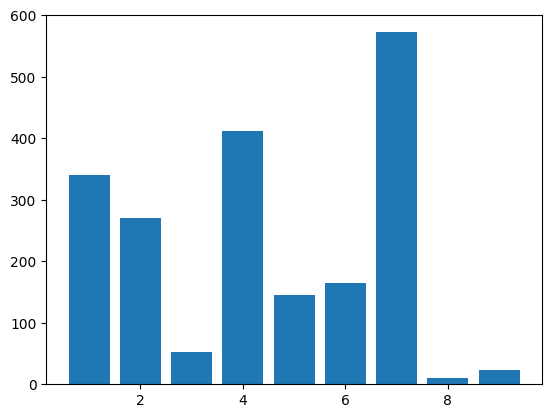

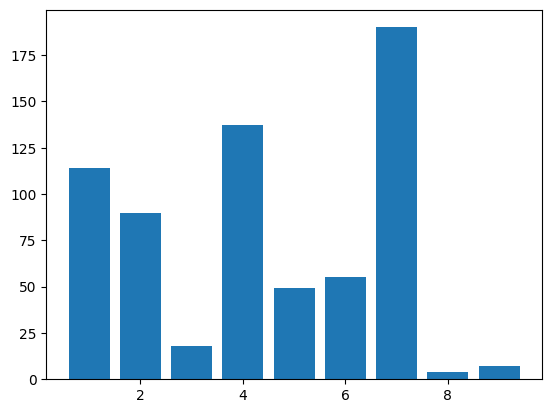

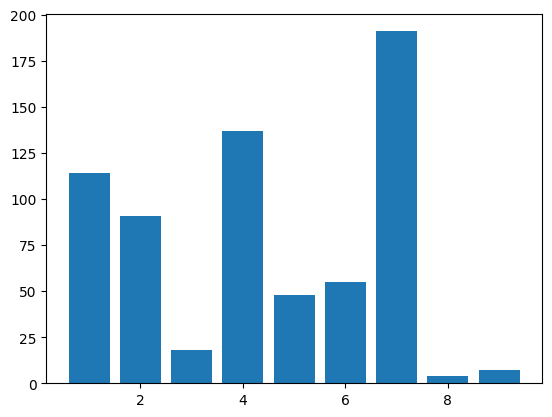

In [13]:
import matplotlib.pyplot as plt
counts=train_df['Class'].value_counts()
counts_cv=train_cv['Class'].value_counts()
counts_test=X_test['Class'].value_counts()

plt.bar(counts.index,counts.values)
plt.show()
plt.bar(counts_cv.index,counts_cv.values)
plt.show()
plt.bar(counts_test.index,counts_test.values)

plt.show()

# Build the random model

In [14]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def cm(test_y,test_pred):
  cm=confusion_matrix(test_y,test_pred)
  disp=ConfusionMatrixDisplay(cm,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()
  A=((cm.T)/((cm.sum(axis=1)).T))
  B=(cm/cm.sum(axis=0))
  disp=ConfusionMatrixDisplay(A,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()
  disp=ConfusionMatrixDisplay(B,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()

In [15]:
import numpy as np
np.random.rand(1,9)/np.sum(np.random.rand(1,9)[0])

array([[0.11853365, 0.17711575, 0.00804802, 0.08745326, 0.18060142,
        0.09495743, 0.08440296, 0.02293656, 0.05325904]])

In [16]:
from sklearn.metrics import log_loss
test_data_len=X_test.shape[0]
cv_data_len=train_cv.shape[0]
cv_prd=np.zeros((cv_data_len,9))
for i in range(cv_data_len):
  prob=np.random.rand(1,9)
  cv_prd[i]=((prob/(np.sum(prob)))[0])
print("Random model logloss for validatio set is "),+ log_loss(y_cv,cv_prd,eps=1e-15)

Random model logloss for validatio set is 


(None, 2.493116541862392)

In [17]:

test_prd=np.zeros((test_data_len,9))
for i in range(test_data_len):
  prob_test=np.random.rand(1,9)
  test_prd[i]=((prob_test/(np.sum(prob_test)))[0])
print("Random model logloss for validatio set is "),+ log_loss(Y_test,test_prd,eps=1e-15)

Random model logloss for validatio set is 


(None, 2.5021795161124096)

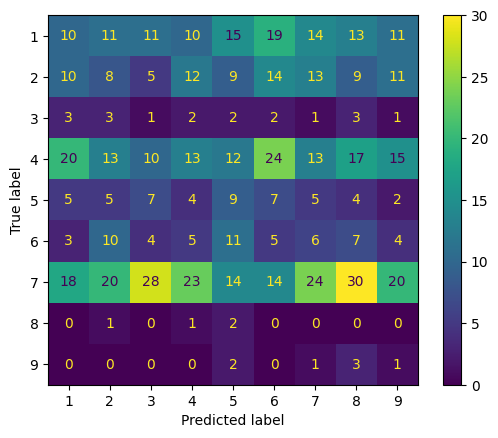

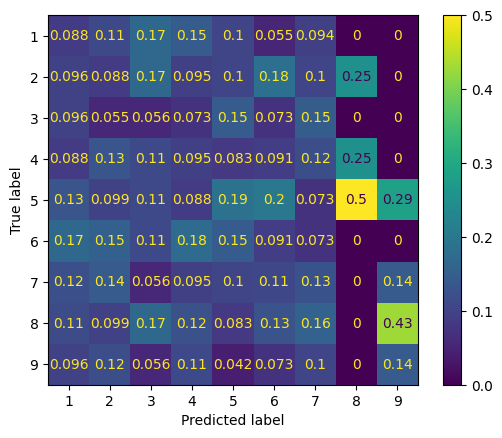

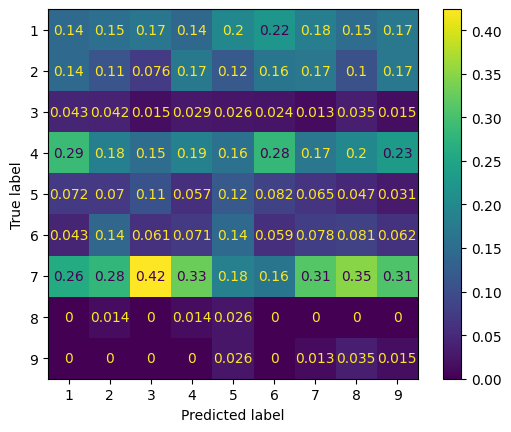

In [18]:
y_predicted=np.argmax(test_prd,axis=1)
cm(Y_test,y_predicted+1)

# Univar analysis

In [19]:
gene_feat= train_df['Gene'].value_counts()
print('gene total no.=',gene_feat.shape[0])
print('count of each of it is =')
gene_feat.head(10)

gene total no.= 226
count of each of it is =


BRCA1     155
TP53       99
EGFR       88
BRCA2      81
PTEN       81
KIT        57
BRAF       50
ERBB2      46
ALK        41
PIK3CA     36
Name: Gene, dtype: int64

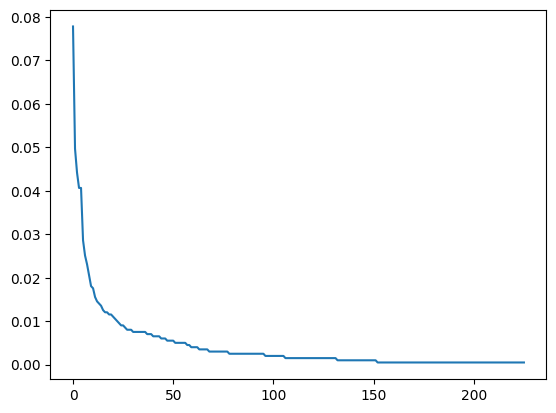

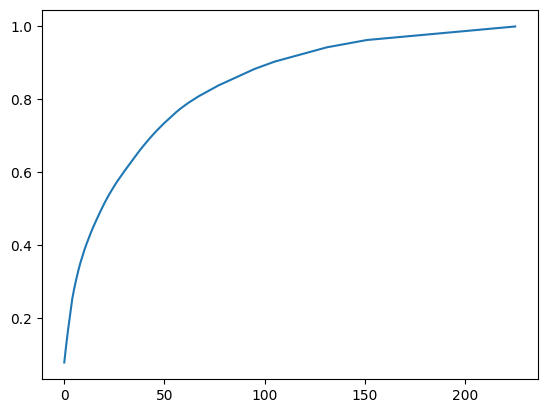

In [20]:
s=sum(gene_feat.values)
h=gene_feat.values/s
plt.plot(h)
plt.show()
c=np.cumsum(h)
plt.plot(c)
plt.show()

In [21]:
sum(gene_feat.values)

1992

# Univar Variation analysis

In [24]:
unique_var=train_df['Variation'].value_counts()
print('unique variation count is', unique_var.shape[0])

unique variation count is 1803


In [27]:
unique_var

Truncating Mutations    58
Amplification           51
Deletion                41
Fusions                 18
Overexpression           5
                        ..
R1598P                   1
W24R                     1
I2675V                   1
R866C                    1
R669G                    1
Name: Variation, Length: 1803, dtype: int64

In [28]:
train_df.shape

(1992, 5)

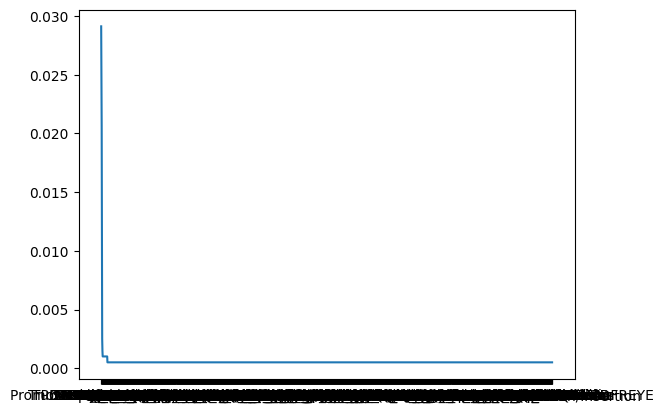

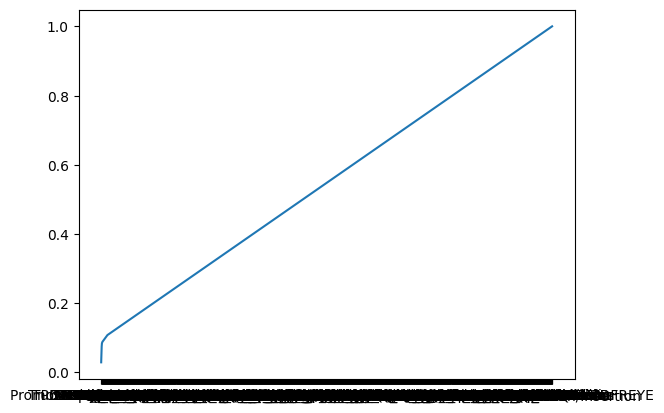

In [30]:
s= sum(unique_var.values)
h=unique_var/s
plt.plot(h)
plt.show()
c=np.cumsum(h)
plt.plot(c)
plt.show()

# Building model for gene and variation for feature

In [61]:
data.loc[(data['Class']==1)&(data['Gene']=='BRCA1')].shape

(60, 5)

In [64]:
#train_df.loc[(train_df['Class']==1)& (train_df['Gene']=='BRCA1')].shape[0]

"""a=train_df['Gene'].value_counts().items()
for i,b in a:
  print(b)"""


def response_coding_dict(alpha,feature,data):
  feature_dict=dict()
  for i, j in data[feature].value_counts().items():
    vec_prob=[]
    for k in range(1,10):
      class_locate= data.loc[(data['Class']==k)&(data[feature]==i)]
      vec_prob.append((class_locate.shape[0] + 10*alpha)/ (j + 90 * alpha))
    feature_dict[i]=vec_prob
  return feature_dict
def response_coding(alpha,feature,data):
  response_dict=response_coding_dict(alpha,feature,data)
  dict_to_compare=data[feature].value_counts()
  response_coded=[]
  for _, row in data.iterrows():
    if row[feature] in dict(dict_to_compare).keys():
      response_coded.append(response_dict[row[feature]])
    else:
      response_coded.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
  return response_coded

In [74]:
training_response_coded= np.array(response_coding(1,"Gene",train_df))
val_response_coded=np.array(response_coding(1,"Gene",train_cv))
test_response_coded=np.array(response_coding(1,"Gene",X_test))

In [81]:
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.calibration import CalibratedClassifierCV as cc
from sklearn.metrics import log_loss
alpha =[10**x for x in range(-5,1)]
log_error=[]
for i in alpha:
  model=sgd(alpha=1,penalty='l2',loss='log_loss')
  model.fit(training_response_coded,y_train)
  model_cc=cc(model,method='sigmoid')
  model_cc.fit(training_response_coded,y_train)
  predict_y=model_cc.predict_proba(val_response_coded)
  log_error.append(log_loss(y_cv,predict_y,labels=model.classes_))


In [84]:
best_alpha=np.min(log_error)
model=sgd(alpha=best_alpha,penalty='l2',loss='log_loss')
model.fit(training_response_coded,y_train)
model_cc=cc(model,method='sigmoid')
model_cc.fit(training_response_coded,y_train)
predict_y=model_cc.predict_proba(training_response_coded)
print("for best alpha logloss is ",log_loss(y_train,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(val_response_coded)
print("for best alpha logloss is ",log_loss(y_cv,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(test_response_coded)
print("for best alpha logloss is ",log_loss(Y_test,predict_y,labels=model.classes_))

for best alpha logloss is  1.3303992554116448
for best alpha logloss is  1.4852376507623268
for best alpha logloss is  1.4876636046711673


In [85]:
training_response_coded= np.array(response_coding(1,"Variation",train_df))
val_response_coded=np.array(response_coding(1,"Variation",train_cv))
test_response_coded=np.array(response_coding(1,"Variation",X_test))

In [86]:
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.calibration import CalibratedClassifierCV as cc
from sklearn.metrics import log_loss
alpha =[10**x for x in range(-5,1)]
log_error=[]
for i in alpha:
  model=sgd(alpha=1,penalty='l2',loss='log_loss')
  model.fit(training_response_coded,y_train)
  model_cc=cc(model,method='sigmoid')
  model_cc.fit(training_response_coded,y_train)
  predict_y=model_cc.predict_proba(val_response_coded)
  log_error.append(log_loss(y_cv,predict_y,labels=model.classes_))


In [87]:
best_alpha=np.min(log_error)
model=sgd(alpha=best_alpha,penalty='l2',loss='log_loss')
model.fit(training_response_coded,y_train)
model_cc=cc(model,method='sigmoid')
model_cc.fit(training_response_coded,y_train)
predict_y=model_cc.predict_proba(training_response_coded)
print("for best alpha logloss is ",log_loss(y_train,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(val_response_coded)
print("for best alpha logloss is ",log_loss(y_cv,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(test_response_coded)
print("for best alpha logloss is ",log_loss(Y_test,predict_y,labels=model.classes_))

for best alpha logloss is  0.9866413094352211
for best alpha logloss is  0.9607582237368234
for best alpha logloss is  0.9568691074836355
